In [ ]:
import random
for i in range(5) :
    lotto_set = set()
    while True : 
        lotto_num = int(random.random() * 45) + 1
        lotto_set.add(lotto_num)
        len_set = len(lotto_set)
        if len_set >= 6 :
            break
    print(lotto_set)

In [ ]:
import random
for i in range(5) :
    lotto_set = set()
    while len(lotto_set) <= 7 :
        lotto_set.add( random.randint(1, 45) ) # 1에서 45 이하
    bonus_num = lotto_set.pop()
    print(lotto_set, '+', bonus_num)

In [ ]:
import random
for i in range(5) :
    lotto_set = random.sample(range(1, 46), 7)
    bonus_num = lotto_set.pop()
    print(sorted(lotto_set), '+', bonus_num)

In [2]:
def lotto_get(count = 1) :
    import random
    for i in range(5) :
        lotto_set = random.sample(range(1, 46), 7)
        bonus_num = lotto_set.pop()
        print(sorted(lotto_set), '+', bonus_num)
    print()
    count -= 1
    if count > 0 :
        lotto_get(count) # 재귀 
    else :
        return 


how = input('몇 장 드릴까용? : ')
try : 
    assert int(how) > 1, f'양수만 입력 가능합니다.!! {how}을 입력하셨습니다.' # 참이면 ok 거짓이면 에러
    lotto_get(int(how))
except ValueError as e :
    print(type(e).__name__, ' 숫자만 입력하세요 :', e)
except Exception as e :
    print(type(e).__name__, ':', e)

[15, 19, 22, 26, 37, 39] + 32
[3, 10, 21, 25, 31, 41] + 1
[6, 9, 15, 30, 40, 43] + 23
[7, 12, 17, 18, 24, 39] + 15
[3, 9, 11, 20, 28, 32] + 25

[1, 8, 21, 32, 33, 40] + 11
[2, 3, 11, 15, 18, 45] + 5
[12, 18, 27, 38, 40, 41] + 34
[3, 7, 10, 27, 39, 45] + 9
[12, 16, 26, 30, 40, 42] + 44

[7, 22, 23, 30, 35, 40] + 1
[6, 23, 27, 30, 35, 36] + 29
[2, 10, 19, 20, 37, 42] + 11
[11, 30, 33, 35, 38, 39] + 34
[6, 10, 14, 16, 22, 29] + 17



In [ ]:
# 몇장 드릴까용? 이후에
# 얼마입니다~ (장당 5천원)
# 모자랍니다~, 거스름돈 얼마입니다~


        id  win1  win2  win3  win4  win5  win6  bonus
0        1    10    23    29    33    37    40     16
1        2     9    13    21    25    32    42      2
2        3    11    16    19    21    27    31     30
3        4    14    27    30    31    40    42      2
4        5    16    24    29    40    41    42      3
...    ...   ...   ...   ...   ...   ...   ...    ...
1123  1124     3     8    17    30    33    34     28
1124  1125     6    14    25    33    40    44     30
1125  1126     4     5     9    11    37    40      7
1126  1127    10    15    24    30    31    37     32
1127  1128     1     5     8    16    28    33     45

[1128 rows x 8 columns]


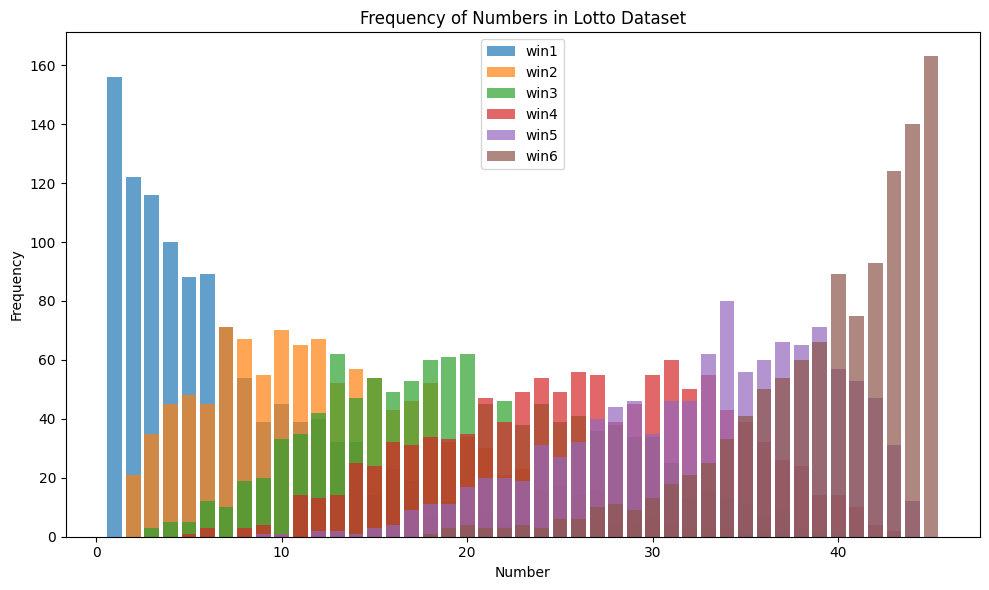

In [10]:
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

conn.close()


# 컬럼 명 리스트
columns = ['id', 'win1', 'win2', 'win3', 'win4', 'win5', 'win6', 'bonus']

# DataFrame 생성
df = pd.DataFrame(rows, columns=columns)

# DataFrame 출력
print(df)

# 중복된 숫자의 개수 카운트
counts = {}
for col in df.columns[1:7]:  # win1부터 win6까지만 확인
    counts[col] = df[col].value_counts()

# 그래프 생성
plt.figure(figsize=(10, 6))
for col, count in counts.items():
    plt.bar(count.index, count.values, alpha=0.7, label=col)

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in Lotto Dataset')
plt.legend()
plt.tight_layout()
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt



In [35]:
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

accumulate = {}
for row in rows :
    # print(row)
    for i in row[1:-1] :
        # print(i)
        if not accumulate.get(i) :
            accumulate[i] = 0
        accumulate.update({i : accumulate.get(i) + 1})

print(len(accumulate), accumulate)
keys =  sorted(accumulate.keys())
for i in keys :
    print(i, accumulate.get(i))
    pass

conn.close()

# 가중치 
# 루프를 돌때 가중치를 전체적으로 줄이고 당첨되면 가중치를 증가시킨다. 또는 가중치를 반으로 나누고 당첨되면 더블링

45 {10: 150, 23: 136, 29: 140, 33: 161, 37: 156, 40: 161, 9: 119, 13: 162, 21: 153, 25: 139, 32: 133, 42: 144, 11: 153, 16: 151, 19: 152, 27: 158, 31: 153, 14: 162, 30: 144, 24: 151, 41: 138, 15: 149, 26: 152, 2: 143, 8: 143, 34: 172, 39: 153, 4: 150, 17: 158, 36: 151, 44: 152, 1: 156, 7: 152, 45: 163, 22: 134, 38: 152, 6: 149, 12: 164, 3: 154, 35: 148, 43: 157, 18: 165, 20: 157, 5: 142, 28: 136}
1 156
2 143
3 154
4 150
5 142
6 149
7 152
8 143
9 119
10 150
11 153
12 164
13 162
14 162
15 149
16 151
17 158
18 165
19 152
20 157
21 153
22 134
23 136
24 151
25 139
26 152
27 158
28 136
29 140
30 144
31 153
32 133
33 161
34 172
35 148
36 151
37 156
38 152
39 153
40 161
41 138
42 144
43 157
44 152
45 163
